In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

To jest program - **klasyfikator** dla rozpoznawania podgatunków kwiatów *irysów* - <span style="color:red; font-size:15pt;">zbiór iris</span>.<br>Przykładowy wzór matematyczny:<br>

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [3]:
df = pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df.head(7)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [5]:
features = ['sepal length','sepal width','petal length','petal width']
x = df.loc[:,features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [6]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])
finalDf = pd.concat([principalDf,df[['target']]],axis=1)

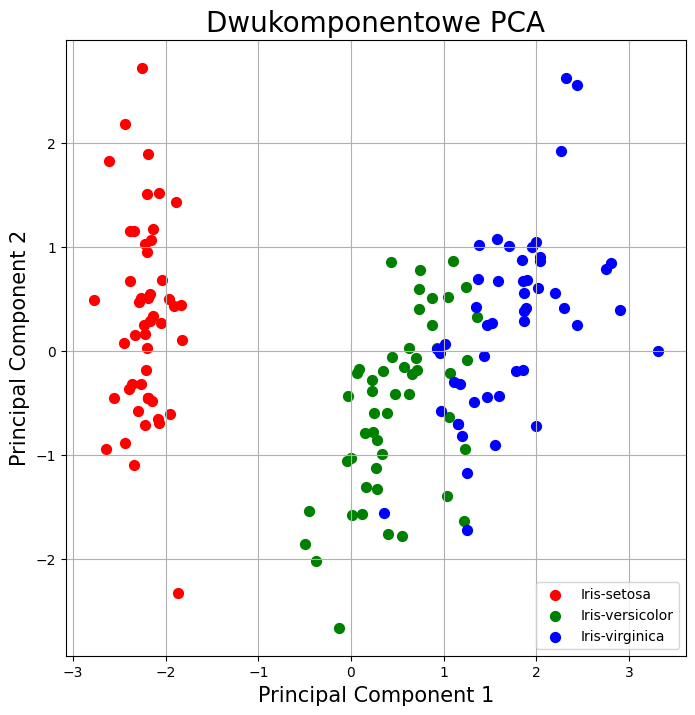

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title("Dwukomponentowe PCA",fontsize=20)

targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['r','g','b']

for target, color in zip(targets,colors):
    itk = finalDf['target'] == target
    ax.scatter(finalDf.loc[itk,'principal component 1'],
               finalDf.loc[itk,'principal component 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()
plt.show()